In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [4]:
%matplotlib inline

In [8]:
df_main= pd.read_csv('marketing_campaign.csv')
df_main.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/12,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/14,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/14,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [9]:
df=df_main

In [10]:
df_main.shape

(2240, 29)

In [11]:
df_main.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

# Age of each customer

In [12]:
df_main["Age"] = 2021-df_main["Year_Birth"]

# Drop the not important numerical columns and non_numerical columns

In [13]:
df1= df_main.drop(columns={'Year_Birth','Education', 'AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Marital_Status','Dt_Customer','Response','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','Complain'}, axis=1)
df1

,ID,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,Age
0,5524,58138.0,0,0,58,3,8,10,4,7,3,11,64
1,2174,46344.0,1,1,38,2,1,1,2,5,3,11,67
2,4141,71613.0,0,0,26,1,8,2,10,4,3,11,56
3,6182,26646.0,1,0,26,2,2,0,4,6,3,11,37
4,5324,58293.0,1,0,94,5,5,3,6,5,3,11,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,61223.0,0,1,46,2,9,3,4,5,3,11,54
2236,4001,64014.0,2,1,56,7,8,2,5,7,3,11,75
2237,7270,56981.0,0,0,91,1,2,3,13,6,3,11,40
2238,8235,69245.0,0,1,8,2,6,5,10,3,3,11,65


# Distribution of numerical values 

In [14]:
s=df1.describe()
s

,ID,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,Age
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,52247.251354,0.444196,0.506250,49.109375,2.325000,4.084821,2.662054,5.790179,5.316518,3.0,11.0,52.194196
std,3246.662198,25173.076661,0.538398,0.544538,28.962453,1.932238,2.778714,2.923101,3.250958,2.426645,0.0,0.0,11.984069
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,25.000000
25%,2828.250000,35303.000000,0.000000,0.000000,24.000000,1.000000,2.000000,0.000000,3.000000,3.000000,3.0,11.0,44.000000
50%,5458.500000,51381.500000,0.000000,0.000000,49.000000,2.000000,4.000000,2.000000,5.000000,6.000000,3.0,11.0,51.000000
75%,8427.750000,68522.000000,1.000000,1.000000,74.000000,3.000000,6.000000,4.000000,8.000000,7.000000,3.0,11.0,62.000000
max,11191.000000,666666.000000,2.000000,2.000000,99.000000,15.000000,27.000000,28.000000,13.000000,20.000000,3.0,11.0,128.000000


# Total_amount_spent

In [15]:
df['Total_amount_spent']= df['MntWines']+ df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_amount_spent
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/12,58,635,...,0,0,0,0,0,3,11,1,64,1617
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/14,38,11,...,0,0,0,0,0,3,11,0,67,27
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,56,776
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/14,26,11,...,0,0,0,0,0,3,11,0,37,53
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,3,11,0,40,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,3,11,0,54,1341
2236,4001,1946,PhD,Together,64014.0,2,1,10/6/14,56,406,...,0,0,1,0,0,3,11,0,75,444
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,1,0,0,0,0,3,11,0,40,1241
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,3,11,0,65,843


# Distribution of important numerical variables

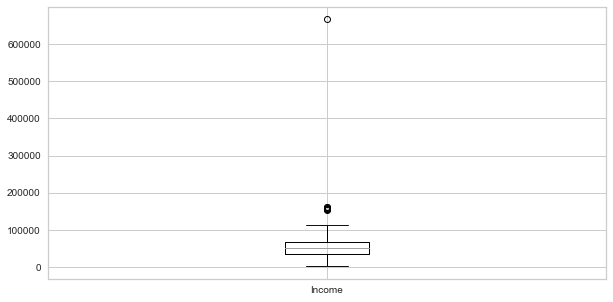

In [16]:
f= plt.figure()
f.set_figwidth(10)
f.set_figheight(5)

#df['Income'].plot(kind='box')
s=df.boxplot(column=['Income'])


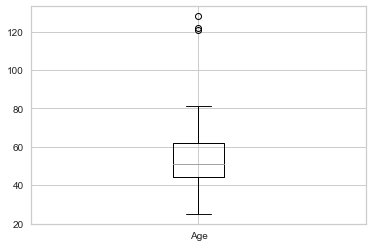

In [17]:
k= df.boxplot(column=['Age'])

In [18]:
df_main.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Total_amount_spent      0
dtype: int64

In [19]:
data=df_main.dropna()
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_amount_spent
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/12,58,635,...,0,0,0,0,0,3,11,1,64,1617
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/14,38,11,...,0,0,0,0,0,3,11,0,67,27
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,56,776
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/14,26,11,...,0,0,0,0,0,3,11,0,37,53
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,3,11,0,40,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,3,11,0,54,1341
2236,4001,1946,PhD,Together,64014.0,2,1,10/6/14,56,406,...,0,0,1,0,0,3,11,0,75,444
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,1,0,0,0,0,3,11,0,40,1241
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,3,11,0,65,843


In [20]:
#replace null with mean
mean= df_main.Income.mean()
df_main.Income.fillna(value=mean, inplace=True)
df_main

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_amount_spent
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/12,58,635,...,0,0,0,0,0,3,11,1,64,1617
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/14,38,11,...,0,0,0,0,0,3,11,0,67,27
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,56,776
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/14,26,11,...,0,0,0,0,0,3,11,0,37,53
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,3,11,0,40,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,3,11,0,54,1341
2236,4001,1946,PhD,Together,64014.0,2,1,10/6/14,56,406,...,0,0,1,0,0,3,11,0,75,444
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,1,0,0,0,0,3,11,0,40,1241
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,3,11,0,65,843


In [21]:
data.shape

(2216, 31)

In [22]:
data= pd.read_csv('marketing_campaign.csv')
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/12,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/14,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/14,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10/6/14,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [23]:
data.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [24]:
data.Dt_Customer = pd.to_datetime(data.Dt_Customer)
dates = []
for i in data.Dt_Customer:
    i = i.date()
    dates.append(i)  
#Dates of the newest and oldest recorded customer
new_customer= "The newest customer's enrolment date in the records is {date}".format(date= max(dates))
print(new_customer)
old_customer= "The oldest customer's enrolment date in the records is {date} ".format(date= min(dates))
print(old_customer)


The newest customer's enrolment date in the records is 2014-12-06
The oldest customer's enrolment date in the records is 2012-01-08 


In [25]:

days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
data['Customer_For'] = days
data['Customer_For'] = pd.to_numeric(data["Customer_For"], errors="coerce")

# Total categories in the feature Marital_Status

In [26]:
data.Marital_Status.value_counts().reset_index()

,index,Marital_Status
0,Married,864
1,Together,580
2,Single,480
3,Divorced,232
4,Widow,77
5,Alone,3
6,Absurd,2
7,YOLO,2


# Total categories in the feature Education

In [27]:
data.Education.value_counts().reset_index()

,index,Education
0,Graduation,1127
1,PhD,486
2,Master,370
3,2n Cycle,203
4,Basic,54


# Feature Engineering

In [28]:

#Age of customer today 
data["Age"] = 2021-data["Year_Birth"]

#Total spendings on various items
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

#Deriving living situation by marital status"Alone"
data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Feature indicating total children living in the household
data["Children"]=data["Kidhome"]+data["Teenhome"]

#Feature for total members in the householde
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]

#Feature pertaining parenthood
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

#Segmenting education levels in three groups
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#For clarity
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

In [29]:
import seaborn as sns

In [30]:
cmap = colors.ListedColormap(["#EE3B3B", "#7F7F7F", "#8B8B83", "#B9C0C9", "#FF8C00", "#EE3B3B"])

In [31]:
#Dropping the outliers by setting a cap on Age and income. 
data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]
print("The total number of data-points after removing the outliers are:", len(data))

The total number of data-points after removing the outliers are: 2212


# Summarizing with group by

In [32]:
data['Total_purchases']= data['NumDealsPurchases']+data['NumWebPurchases']+data['NumStorePurchases']+data['NumStorePurchases']
data

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent,Total_purchases
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,0,1,83894400000000000,64,1617,Alone,0,1,0,19
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,0,0,10800000000000000,67,27,Alone,2,3,1,7
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,0,0,40780800000000000,56,776,Partner,0,2,0,29
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,0,0,5616000000000000,37,53,Partner,1,3,1,12
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,0,0,27734400000000000,40,422,Partner,1,3,1,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,61223.0,0,1,46,709,43,182,42,118,...,0,0,46742400000000000,54,1341,Partner,1,3,1,19
2236,Postgraduate,64014.0,2,1,56,406,0,30,0,0,...,0,0,5270400000000000,75,444,Partner,3,5,1,25
2237,Graduate,56981.0,0,0,91,908,48,217,32,12,...,0,0,27216000000000000,40,1241,Alone,0,1,0,29
2238,Postgraduate,69245.0,0,1,8,428,30,214,80,30,...,0,0,27302400000000000,65,843,Partner,1,3,1,28


# Grouping the Age and Education by mean of the amount spent

In [33]:
df3= data.groupby(['Education'])['Spent'].mean().reset_index()
df3.head(20)

,Education,Spent
0,Graduate,622.188341
1,Postgraduate,646.415385
2,Undergraduate,409.984127


Text(0, 0.5, 'Spent')

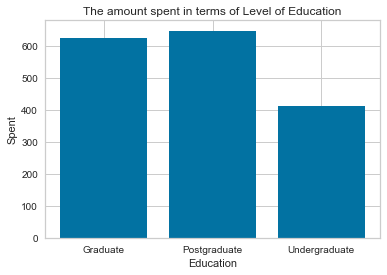

In [34]:
plt.bar('Education','Spent', data=df3)
plt.title('The amount spent in terms of Level of Education')
plt.xlabel('Education')
plt.ylabel('Spent')

# Grouping the Family Size by mean of the amount spent

In [35]:
df4= data.groupby(['Family_Size'])['Spent'].mean().reset_index()
df4

,Family_Size,Spent
0,1,1107.230159
1,2,785.643236
2,3,443.397042
3,4,246.162162
4,5,299.032258


Text(0, 0.5, 'Spent')

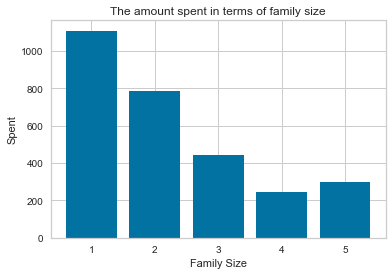

In [36]:
plt.bar('Family_Size','Spent', data=df4)
plt.title('The amount spent in terms of family size')
plt.xlabel('Family Size')
plt.ylabel('Spent')

#  Grouping the children living with by mean of the amount spent

In [37]:
df5= data.groupby(['Children'])['Spent'].mean().reset_index()
df5

,Children,Spent
0,0,1104.064873
1,1,475.844704
2,2,246.735577
3,3,255.500000


Text(0, 0.5, 'Spent')

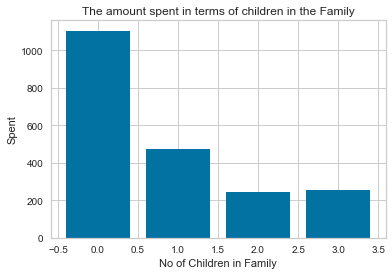

In [38]:
plt.bar('Children','Spent', data=df5)
plt.title('The amount spent in terms of children in the Family')
plt.xlabel('No of Children in Family')
plt.ylabel('Spent')

# Correlation matrix

In [39]:
corrmat= data.corr()
corrmat

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent,Total_purchases
Income,1.000000,-0.514523,0.034565,0.007965,0.688209,0.507354,0.692279,0.520040,0.523599,0.388299,...,0.104036,-0.027900,0.161387,-0.027892,0.199977,0.792740,-0.343529,-0.286638,-0.403132,0.591200
Kidhome,-0.514523,1.000000,-0.039066,0.010623,-0.497203,-0.373258,-0.439031,-0.388643,-0.377843,-0.354922,...,-0.081911,0.037067,-0.077901,-0.057731,-0.237497,-0.557949,0.688081,0.583250,0.520355,-0.443373
Teenhome,0.034565,-0.039066,1.000000,0.014392,0.003945,-0.175905,-0.261134,-0.205235,-0.163107,-0.018579,...,-0.015633,0.007746,-0.154402,0.008986,0.361932,-0.137964,0.698199,0.594481,0.587993,0.173036
Recency,0.007965,0.010623,0.014392,1.000000,0.015981,-0.005257,0.022914,0.000788,0.025244,0.018148,...,-0.001429,0.005713,-0.200114,0.030748,0.015694,0.020479,0.018062,0.014717,0.002189,-0.001557
Wines,0.688209,-0.497203,0.003945,0.015981,1.000000,0.385844,0.568081,0.396915,0.389583,0.391461,...,0.206309,-0.036420,0.246320,0.148745,0.164615,0.892996,-0.353356,-0.296702,-0.341994,0.653321
Fruits,0.507354,-0.373258,-0.175905,-0.005257,0.385844,1.000000,0.546740,0.593038,0.571474,0.393459,...,-0.009924,-0.002956,0.123007,0.059828,0.013447,0.612129,-0.395161,-0.341414,-0.410657,0.408240
Meat,0.692279,-0.439031,-0.261134,0.022914,0.568081,0.546740,1.000000,0.572986,0.534624,0.357556,...,0.043549,-0.021017,0.237966,0.071381,0.033622,0.845543,-0.504176,-0.429948,-0.574147,0.432284
Fish,0.520040,-0.388643,-0.205235,0.000788,0.396915,0.593038,0.572986,1.000000,0.583484,0.426299,...,0.002322,-0.019098,0.108135,0.078042,0.041154,0.641884,-0.427482,-0.363522,-0.449596,0.403877
Sweets,0.523599,-0.377843,-0.163107,0.025244,0.389583,0.571474,0.534624,0.583484,1.000000,0.356754,...,0.010142,-0.020569,0.116059,0.076345,0.021516,0.606652,-0.389152,-0.330705,-0.402064,0.417384
Gold,0.388299,-0.354922,-0.018579,0.018148,0.391461,0.393459,0.357556,0.426299,0.356754,1.000000,...,0.050976,-0.030166,0.141096,0.145632,0.059779,0.527101,-0.267776,-0.235826,-0.245380,0.431172


<AxesSubplot:>

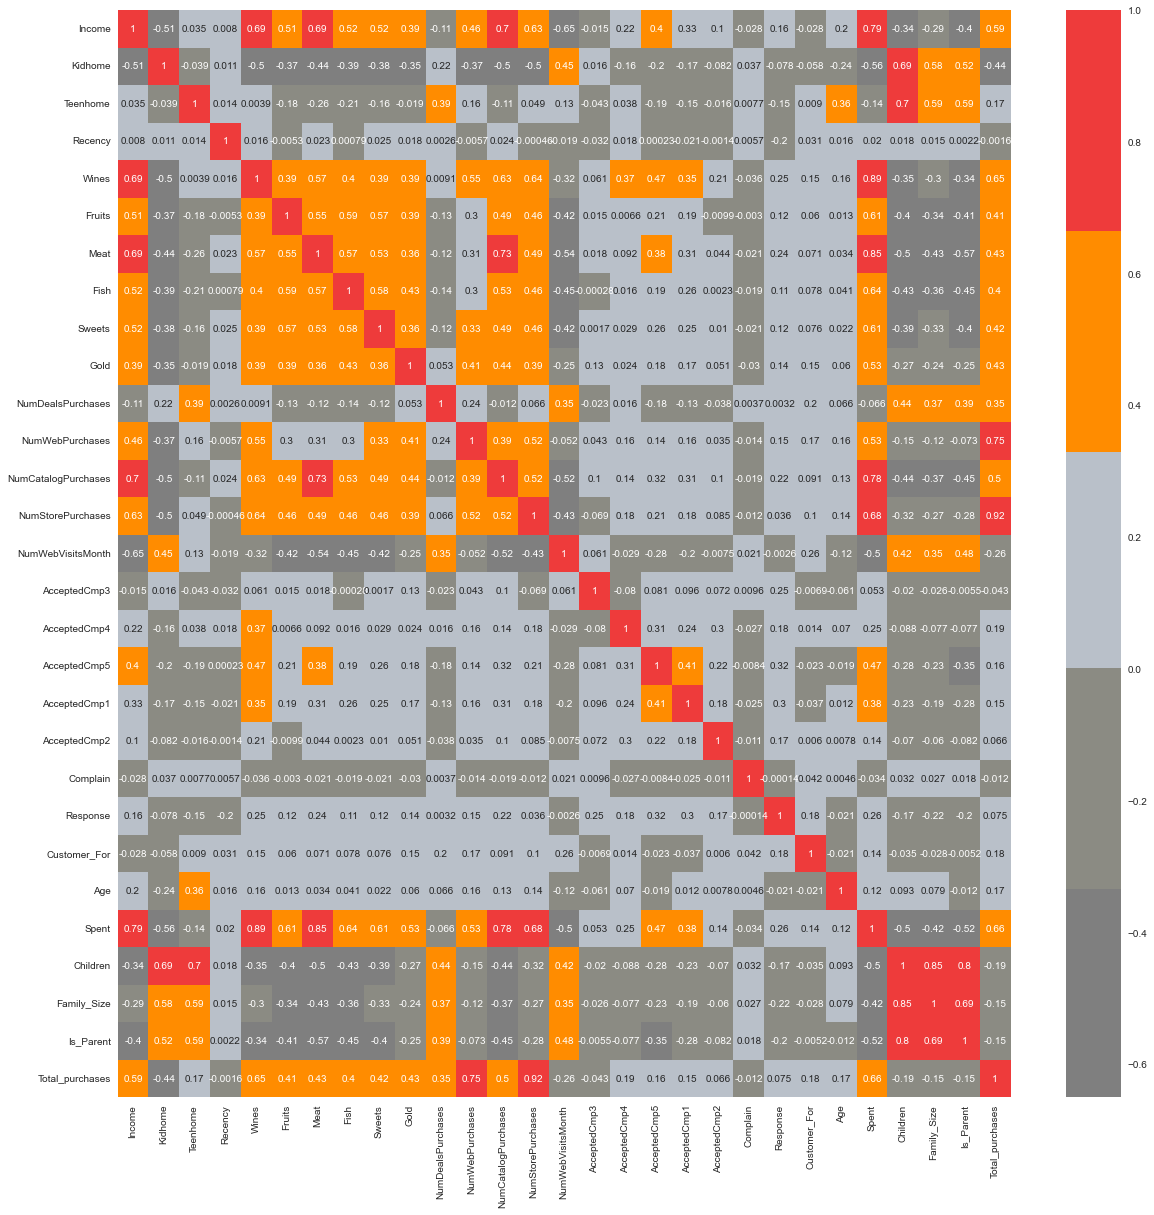

In [40]:
#correlation matrix
corrmat= data.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

In [41]:
#Get list of categorical variables
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Living_With']


In [42]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


In [43]:
#Creating a copy of data
ds = data.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [44]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent,Total_purchases
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,-0.555814,0.692181,1.973583,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139,0.111720
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-1.171160,-0.132545,-1.665144,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456,-1.264383
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,1.290224,-0.544908,-0.172664,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139,1.258473
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.555814,0.279818,-1.923210,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456,-0.691007
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.059532,-0.132545,-0.822130,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456,0.455746


In [45]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,3.011455e-17,2.951287,-5.763878,-2.687285,-0.717200,2.616750,7.534908
col2,2212.0,1.475613e-17,1.800418,-4.267417,-1.409863,-0.210882,1.349725,6.198266
col3,2212.0,9.561369e-18,1.236630,-3.740252,-0.839849,-0.013943,0.838939,6.638006


# Clustering

Elbow Method to determine the number of clusters to be formed:


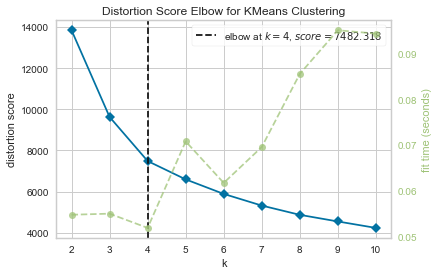

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [48]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [49]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= yhat_AC

# Evaluating Models

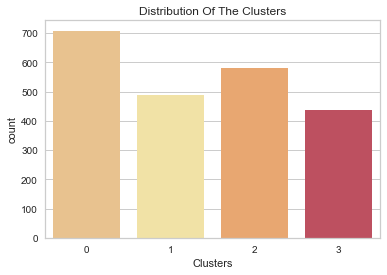

In [50]:
#Plotting countplot of clusters
pal = ['#F7C480', '#fee999', '#fca55d', '#cf3e53']
pl = sns.countplot(x=data["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

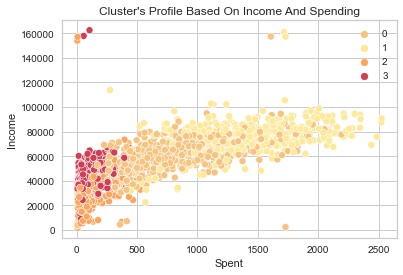

In [51]:
pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

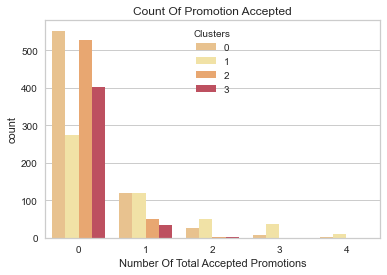

In [52]:
#Creating a feature to get a sum of accepted promotions 
data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=data["Total_Promos"],hue=data["Clusters"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

# Profiling

<Figure size 432x288 with 0 Axes>

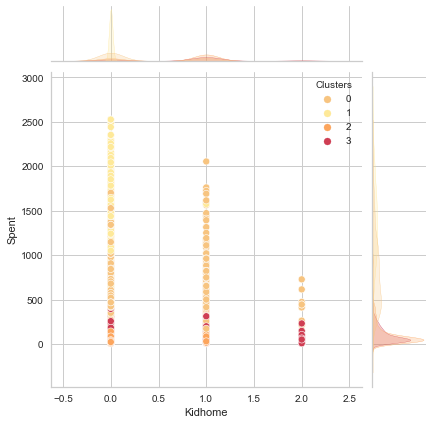

<Figure size 432x288 with 0 Axes>

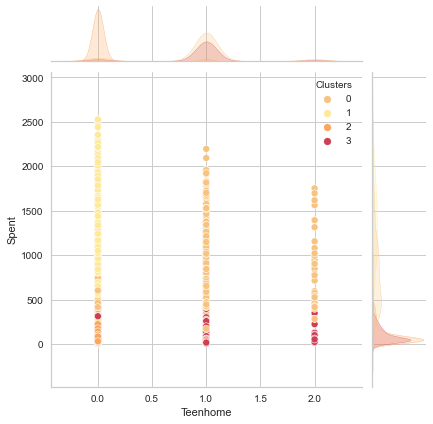

<Figure size 432x288 with 0 Axes>

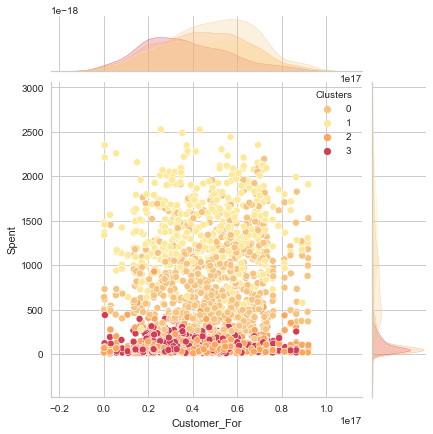

<Figure size 432x288 with 0 Axes>

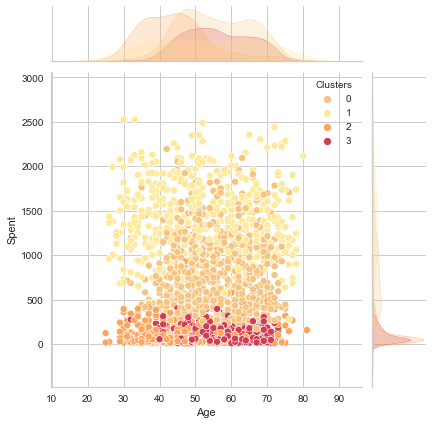

<Figure size 432x288 with 0 Axes>

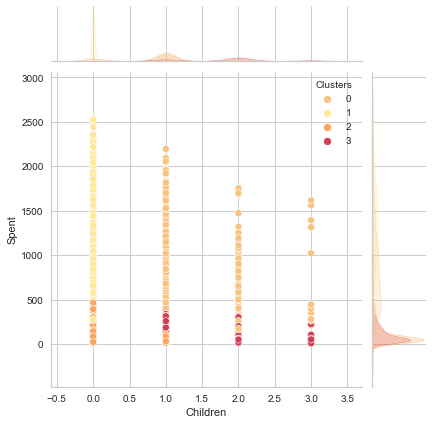

<Figure size 432x288 with 0 Axes>

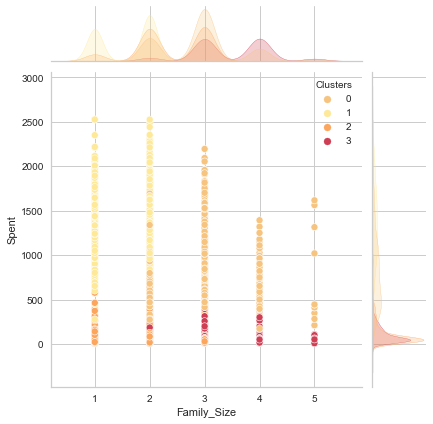

<Figure size 432x288 with 0 Axes>

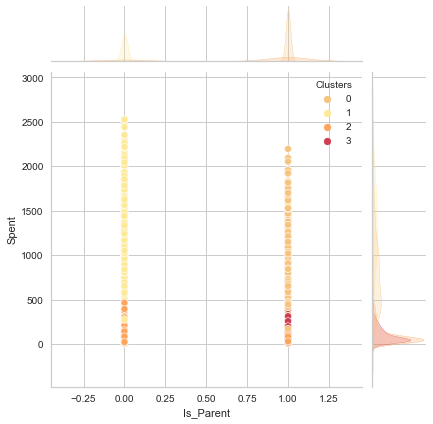

<Figure size 432x288 with 0 Axes>

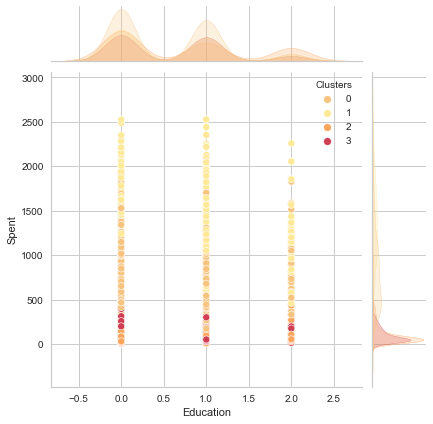

<Figure size 432x288 with 0 Axes>

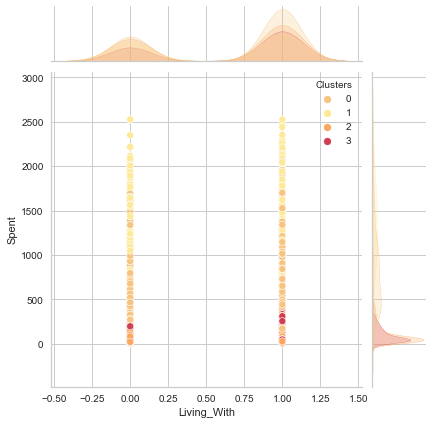

In [57]:
Personal = [ "Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i], y=data["Spent"],  hue =data["Clusters"], kind="scatter", palette=pal)
    plt.show()
    

  

In [61]:
s=plt.show()

In [64]:
plt.savefig('Profiling.png')

<Figure size 432x288 with 0 Axes>